In [17]:
import pylangacq
import matplotlib.pyplot as plt

In [19]:
hc = pylangacq.read_chat('./data/DementiaBank/Pitt/Control/cookie') # healthy control
ad = pylangacq.read_chat('./data/DementiaBank/Pitt/Dementia/cookie') # Alzheimer's disease

print(f'Number of participants (Control): {hc.n_files()}')
print(f'Number of participants (Dementia): {ad.n_files()}')

Number of participants (Control): 243
Number of participants (Dementia): 309


In [20]:
numu_hc = []
numw_hc = []
for f in hc:
    numu_hc.append(len(f.utterances(participants='PAR')))
    numw_hc.append(len(f.words(participants='PAR')))
    
numu_ad = []
numw_ad = []
for f in ad:
    numu_ad.append(len(f.utterances(participants='PAR')))
    numw_ad.append(len(f.words(participants='PAR')))

Text(0.5, 1.0, 'Healthy Control Utterances')

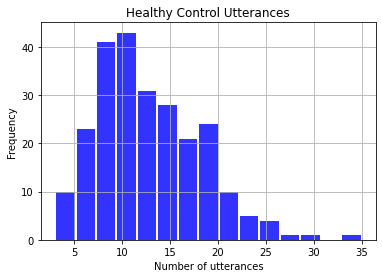

In [21]:
plt.hist(x=numu_hc, bins='auto', color='blue', alpha=0.8, rwidth=0.9)
plt.grid()
plt.xlabel('Number of utterances')
plt.ylabel('Frequency')
plt.title('Healthy Control Utterances')

Text(0.5, 1.0, 'Healthy Control Words')

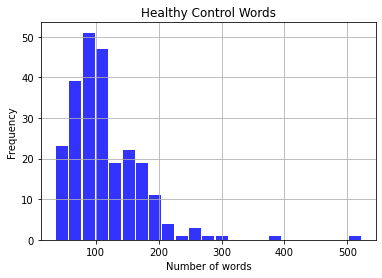

In [22]:
plt.hist(x=numw_hc, bins='auto', color='blue', alpha=0.8, rwidth=0.9)
plt.grid()
plt.xlabel('Number of words')
plt.ylabel('Frequency')
plt.title('Healthy Control Words')

Text(0.5, 1.0, 'Dementia Utterances')

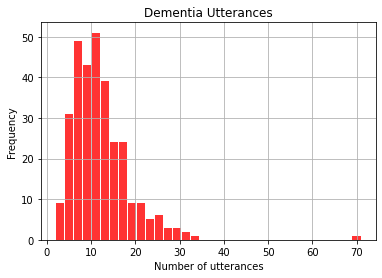

In [23]:
plt.hist(x=numu_ad, bins='auto', color='red', alpha=0.8, rwidth=0.9)
plt.grid()
plt.xlabel('Number of utterances')
plt.ylabel('Frequency')
plt.title('Dementia Utterances')